In [65]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('quiz_database.db')
cursor = conn.cursor()

# Drop the 'users' table if it exists
drop_table_sql = '''
DROP TABLE IF EXISTS users;
'''
cursor.execute(drop_table_sql)

# Define the SQL statement to create the 'users' table with the new column 'areas_of_interest'
create_users_table_sql = '''
CREATE TABLE IF NOT EXISTS users (
    user_id TEXT PRIMARY KEY,
    reward INTEGER DEFAULT 0,
    subject_and_score TEXT,
    points INTEGER DEFAULT 0,
    time_taken INTEGER DEFAULT 0,
    areas_of_interest TEXT,
    suggestions TEXT  -- New column added for suggestions
);
'''

# Execute the SQL statement to create the 'users' table
cursor.execute(create_users_table_sql)

# Define the SQL statement to insert sample values into the 'users' table
insert_sample_values_sql = '''
INSERT INTO users (user_id, subject_and_score, points, time_taken, areas_of_interest)
VALUES
    ('user1', 'Python-500, SQL-200, Java-300', 500, 30, 'Data Science, Machine Learning'),
    ('user2', 'Python-300, SQL-400, C++-250', 300, 45, 'Web Development, Algorithms'),
    ('user3', 'Python-400, SQL-300, JavaScript-350', 700, 25, 'Data Science, Web Development, JavaScript'),
    ('user4', 'Python-200, SQL-100, HTML-150, CSS-180', 400, 60, 'Web Development, HTML, CSS'),
    ('user5', 'Python-300, SQL-400, R-350, MATLAB-300', 600, 40, 'Data Science, MATLAB');
'''

# Execute the SQL statement to insert sample values
cursor.execute(insert_sample_values_sql)

# Commit the changes
conn.commit()

# Close the connection
conn.close()

print("Sample values inserted into the 'users' table.")


Sample values inserted into the 'users' table.


In [66]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('quiz_database.db')
cursor = conn.cursor()

# Retrieve all rows from the 'users' table
cursor.execute('SELECT * FROM users;')
user_details = cursor.fetchall()

# Display the user details
for user in user_details:
    print(user)

#print('no data')
# Close the connection
conn.close()

#('user1', 112, 'Python-500, SQL-200, Java-300', 620, 30, 'Data Science, Machine Learning', None)

('user1', 0, 'Python-500, SQL-200, Java-300', 500, 30, 'Data Science, Machine Learning', None)
('user2', 0, 'Python-300, SQL-400, C++-250', 300, 45, 'Web Development, Algorithms', None)
('user3', 0, 'Python-400, SQL-300, JavaScript-350', 700, 25, 'Data Science, Web Development, JavaScript', None)
('user4', 0, 'Python-200, SQL-100, HTML-150, CSS-180', 400, 60, 'Web Development, HTML, CSS', None)
('user5', 0, 'Python-300, SQL-400, R-350, MATLAB-300', 600, 40, 'Data Science, MATLAB', None)


In [71]:
import sqlite3
import math

# Define the User class
class User:
    def __init__(self, user_id, subject_and_score, points, time_taken):
        self.user_id = user_id
        self.subject_and_score = subject_and_score
        self.points = points
        self.time_taken = time_taken
        self.reward = 0  # Initialize reward to zero

# Function to load user data from the database
def fetch_user_data():
    conn = sqlite3.connect('quiz_database.db')
    cursor = conn.cursor()
    cursor.execute('SELECT user_id, subject_and_score, points, time_taken FROM users;')
    user_details = cursor.fetchall()
    conn.close()
    return [User(*user_info) for user_info in user_details]

# Load user data
users = fetch_user_data()

# Define parameters for reward calculation
marks_weight = 0.6  # Weight assigned to marks scored
time_weight = 0.4  # Weight assigned to time taken
benchmark_marks = 500  # Benchmark marks for comparison
benchmark_time = 60  # Benchmark time in minutes

# Calculate reward for each user and update the database
conn = sqlite3.connect('quiz_database.db')
cursor = conn.cursor()

for user in users:
    # Normalize time taken (assuming lower time is better)
    normalized_time = min(1, user.time_taken / benchmark_time)
    
    # Normalize marks scored (assuming higher marks is better)
    normalized_marks = max(1, user.points / benchmark_marks)
    
    # Calculate reward using weighted combination of normalized marks and time
    reward = math.ceil((normalized_marks * marks_weight + normalized_time * time_weight) * 100)
    
    # Update the reward for the current user in the database
    cursor.execute("UPDATE users SET reward = ? WHERE user_id = ?", (reward, user.user_id))

conn.commit()
conn.close()

conn = sqlite3.connect('quiz_database.db')
cursor = conn.cursor()
cursor.execute('SELECT * FROM users')
updated_users = cursor.fetchall()
conn.close()

for user in updated_users:
    print(user)


('user1', 80, 'Python-500, SQL-200, Java-300', 500, 30, 'Data Science, Machine Learning', None)
('user2', 66, 'Python-300, SQL-400, C++-250', 300, 45, 'Web Development, Algorithms', None)
('user3', 77, 'Python-400, SQL-300, JavaScript-350', 700, 25, 'Data Science, Web Development, JavaScript', None)
('user4', 88, 'Python-200, SQL-100, HTML-150, CSS-180', 400, 60, 'Web Development, HTML, CSS', None)
('user5', 87, 'Python-300, SQL-400, R-350, MATLAB-300', 600, 40, 'Data Science, MATLAB', None)


In [73]:
import sqlite3
import networkx as nx

class User:
    def __init__(self, user_id, reward, subject_and_score, points, areas_of_interest):
        self.user_id = user_id
        self.reward = reward
        self.points = points
        self.subject_and_score = subject_and_score
        self.areas_of_interest = areas_of_interest
        self.subject_marks = {}
        self.graph = nx.DiGraph()  # Initialize a directed graph for the user

        # Parse areas_of_interest to extract subject marks and construct the graph
        self.parse_subject_and_score()

    def parse_subject_and_score(self):
        subjects = self.subject_and_score.split(', ')
        for subject in subjects:
            subject_name, mark = subject.split('-')
            self.subject_marks[subject_name] = int(mark)
            self.graph.add_node(subject_name, proficiency=int(mark))  # Add node with proficiency level

class WeakAreaIdentifier:
    def __init__(self, users):
        self.users = users

    def identify_weaker_areas(self, threshold):
        weaker_areas = {}
        for user in self.users:
            for subject, mark in user.subject_marks.items():
                if mark < threshold:
                    if user.user_id not in weaker_areas:
                        weaker_areas[user.user_id] = []
                    weaker_areas[user.user_id].append(subject)
        return weaker_areas

class AdaptiveLearningSystem:
    def __init__(self, users):
        self.users = users
        self.weak_area_identifier = WeakAreaIdentifier(users)

    def suggest_learning_path(self, user_id):
        weaker_areas = self.weak_area_identifier.identify_weaker_areas(250)  # Set threshold for weaker areas
        if user_id in weaker_areas:
            # Here, you could use graph algorithms to suggest a learning path based on user's current proficiency and graph structure
            return f"Suggested learning path for {user_id}: Focus on {', '.join(weaker_areas[user_id])}"
        else:
            return f"No specific learning path suggested for {user_id}. Keep up the good work!"

# Fetch user data from the database
def fetch_user_data():
    conn = sqlite3.connect('quiz_database.db')
    cursor = conn.cursor()
    cursor.execute('SELECT user_id, reward, subject_and_score, points, areas_of_interest FROM users;')  # Select only required columns
    user_details = cursor.fetchall()
    conn.close()

    users = []
    for user_info in user_details:
        user = User(*user_info)
        users.append(user)
    return users

if __name__ == "__main__":
    # Fetch user data from the database
    users = fetch_user_data()

    # Initialize the adaptive learning system
    adaptive_system = AdaptiveLearningSystem(users)

    # Example: Suggest learning path for each user
    for user in users:
        learning_path = adaptive_system.suggest_learning_path(user.user_id)
        print(learning_path)


Suggested learning path for user1: Focus on SQL
No specific learning path suggested for user2. Keep up the good work!
No specific learning path suggested for user3. Keep up the good work!
Suggested learning path for user4: Focus on Python, SQL, HTML, CSS
No specific learning path suggested for user5. Keep up the good work!


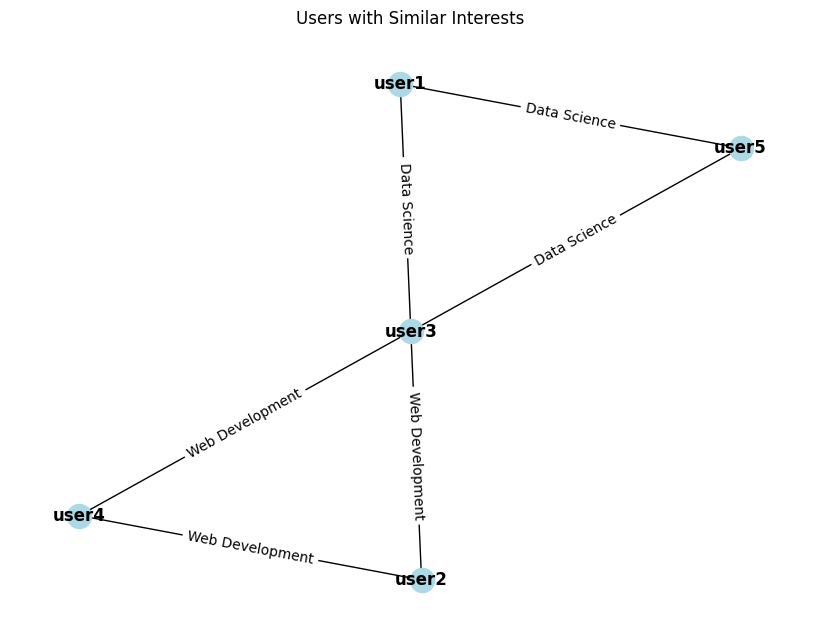

In [88]:
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('quiz_database.db')
cursor = conn.cursor()

# Retrieve data from the users table
cursor.execute("SELECT user_id, areas_of_interest FROM users")
user_interest_data = cursor.fetchall()

# Create a graph
G_interests = nx.Graph()

# Add nodes for each user
for user_id, interests in user_interest_data:
    G_interests.add_node(user_id, label=user_id)

# Add edges between users with common interests
for i in range(len(user_interest_data)):
    for j in range(i + 1, len(user_interest_data)):
        user1_id, user1_interests = user_interest_data[i]
        user2_id, user2_interests = user_interest_data[j]
        common_interests = set(user1_interests.split(', ')).intersection(set(user2_interests.split(', ')))
        if common_interests:
            G_interests.add_edge(user1_id, user2_id, common_interests=', '.join(common_interests))

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_interests, seed=42)  # Position nodes using the spring layout algorithm
nx.draw(G_interests, pos, with_labels=True, node_color='lightblue', font_weight='bold', labels=nx.get_node_attributes(G_interests, 'label'))
edge_labels = nx.get_edge_attributes(G_interests, 'common_interests')
nx.draw_networkx_edge_labels(G_interests, pos, edge_labels=edge_labels)
plt.title('Users with Similar Interests')
plt.show()

# Close the connection
conn.close()

In [126]:
import sqlite3
import networkx as nx

# Lists to store suggestions and user points
suggestions = []
user_points = []

class User:
    def __init__(self, user_id, reward, subject_and_score, points, areas_of_interest):
        self.user_id = user_id
        self.reward = reward
        self.points = points
        self.subject_and_score = subject_and_score
        self.areas_of_interest = areas_of_interest
        self.subject_marks = {}
        self.graph = nx.DiGraph()  # Initialize a directed graph for the user

        # Parse areas_of_interest to extract subject marks and construct the graph
        self.parse_subject_and_score()

    def parse_subject_and_score(self):
        subjects = self.subject_and_score.split(', ')
        for subject in subjects:
            subject_name, mark = subject.split('-')
            self.subject_marks[subject_name] = int(mark)
            self.graph.add_node(subject_name, proficiency=int(mark))  # Add node with proficiency level

class WeakAreaIdentifier:
    def __init__(self, users):
        self.users = users

    def identify_weaker_areas(self, threshold):
        weaker_areas = {}
        for user in self.users:
            for subject, mark in user.subject_marks.items():
                if mark < threshold:
                    if user.user_id not in weaker_areas:
                        weaker_areas[user.user_id] = []
                    weaker_areas[user.user_id].append(subject)
        return weaker_areas

class AdaptiveLearningSystem:
    def __init__(self, users):
        self.users = users
        self.weak_area_identifier = WeakAreaIdentifier(users)

    def suggest_learning_path(self, user_id):
        weaker_areas = self.weak_area_identifier.identify_weaker_areas(250)  # Set threshold for weaker areas
        if user_id in weaker_areas:
            suggestion = f"Suggested learning path for {user_id}: Focus on {', '.join(weaker_areas[user_id])}"
        else:
            suggestion = f"No specific learning path suggested for {user_id}. Keep up the good work!"
        suggestions.append(suggestion)  # Append suggestion to the list
        return suggestion

    def allocate_points_knapsack(self):
        # Define knapsack parameters
        knapsack_capacity = 500  # Maximum total proficiency level
        rewards = [user.reward for user in self.users]  # Values
        proficiencies = [sum(user.subject_marks.values()) for user in self.users]  # Weights

        # Solve knapsack problem
        dp = [[0] * (knapsack_capacity + 1) for _ in range(len(self.users) + 1)]
        for i in range(1, len(self.users) + 1):
            for j in range(1, knapsack_capacity + 1):
                if proficiencies[i - 1] <= j:
                    # Try to include the current user's reward while respecting the capacity
                    dp[i][j] = max(dp[i - 1][j], rewards[i - 1] + dp[i - 1][j - proficiencies[i - 1]])
                else:
                    # If the current user's proficiency exceeds the capacity, exclude them
                    dp[i][j] = dp[i - 1][j]

        # Backtrack to find selected users
        selected_users = []
        i, j = len(self.users), knapsack_capacity
        while i > 0 and j > 0:
            if dp[i][j] != dp[i - 1][j]:
                selected_users.append(self.users[i - 1])
                j -= proficiencies[i - 1]
            i -= 1

        # Allocate points to selected users using the knapsack algorithm
        for user in selected_users:
            user.points += user.reward
            user_points.append(user.points)  # Append user points
        return selected_users  # Return the selected users

   

# Fetch user data from the database
def fetch_user_data():
    conn = sqlite3.connect('quiz_database.db')
    cursor = conn.cursor()
    cursor.execute('SELECT user_id, reward, subject_and_score, points, areas_of_interest FROM users;')  # Select only required columns
    user_details = cursor.fetchall()
    conn.close()

    users = []
    for user_info in user_details:
        user = User(*user_info)
        users.append(user)
    return users

if __name__ == "__main__":
    # Fetch user data from the database
    users = fetch_user_data()

    # Initialize the adaptive learning system
    adaptive_system = AdaptiveLearningSystem(users)

    # Example: Suggest learning path for each user
    for user in users:
        learning_path = adaptive_system.suggest_learning_path(user.user_id)
        print(learning_path)

    # Allocate points using knapsack algorithm and get the selected users
    selected_users = adaptive_system.allocate_points_knapsack()

    # Display user points after allocation
    for user in users:
        print(f"{user.user_id} - Points: {user.points}")
        user_points.append(user.points)

    # Print suggestions and user points lists
    print("Suggestions:", suggestions)
    print("User Points:", user_points)


Suggested learning path for user1: Focus on SQL
No specific learning path suggested for user2. Keep up the good work!
No specific learning path suggested for user3. Keep up the good work!
Suggested learning path for user4: Focus on Python, SQL, HTML, CSS
No specific learning path suggested for user5. Keep up the good work!
user1 - Points: 580
user2 - Points: 366
user3 - Points: 777
user4 - Points: 488
user5 - Points: 687
Suggestions: ['Suggested learning path for user1: Focus on SQL', 'No specific learning path suggested for user2. Keep up the good work!', 'No specific learning path suggested for user3. Keep up the good work!', 'Suggested learning path for user4: Focus on Python, SQL, HTML, CSS', 'No specific learning path suggested for user5. Keep up the good work!']
User Points: [580, 366, 777, 488, 687]


In [115]:
import sqlite3

# Open connection to the database
conn = sqlite3.connect('quiz_database.db')
cursor = conn.cursor()

# Update the 'points' and 'suggestions' columns in the 'users' table
for i, (points, suggestion) in enumerate(zip(user_points, suggestions), start=1):
    cursor.execute("UPDATE users SET points = ?, suggestions = ? WHERE rowid = ?", (points, suggestion, i))

# Commit changes and close connection
conn.commit()
conn.close()

print("Points and suggestions updated successfully.")


Points and suggestions updated successfully.


In [116]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('quiz_database.db')
cursor = conn.cursor()

# Fetch and display the contents of the 'users' table
cursor.execute('SELECT * FROM users')
users_data = cursor.fetchall()

print("Contents of the 'users' table:")
for user in users_data:
    print(user)

# Close the connection
conn.close()


Contents of the 'users' table:
('user1', 80, 'Python-500, SQL-200, Java-300', 580, 30, 'Data Science, Machine Learning', 'Suggested learning path for user1: Focus on SQL')
('user2', 66, 'Python-300, SQL-400, C++-250', 366, 45, 'Web Development, Algorithms', 'No specific learning path suggested for user2. Keep up the good work!')
('user3', 77, 'Python-400, SQL-300, JavaScript-350', 777, 25, 'Data Science, Web Development, JavaScript', 'No specific learning path suggested for user3. Keep up the good work!')
('user4', 88, 'Python-200, SQL-100, HTML-150, CSS-180', 488, 60, 'Web Development, HTML, CSS', 'Suggested learning path for user4: Focus on Python, SQL, HTML, CSS')
('user5', 87, 'Python-300, SQL-400, R-350, MATLAB-300', 687, 40, 'Data Science, MATLAB', 'No specific learning path suggested for user5. Keep up the good work!')


HTML leaderboard with embedded pie chart generated successfully.


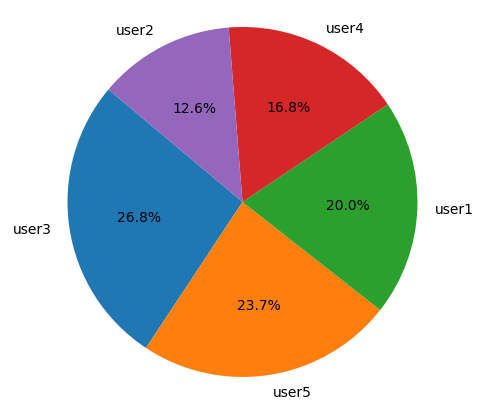

In [117]:
import sqlite3
import matplotlib.pyplot as plt
import io
import base64

# Define the User class
class User:
    def __init__(self, user_id, reward, subject_and_score, points, time_taken, areas_of_interest, suggestions):
        self.user_id = user_id
        self.reward = reward
        self.subject_and_score = subject_and_score
        self.points = points
        self.time_taken = time_taken
        self.areas_of_interest = areas_of_interest
        self.suggestions = suggestions

# Define the fetch_user_data function to retrieve user data from the database
def fetch_user_data():
    conn = sqlite3.connect('quiz_database.db')
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM users;')
    user_details = cursor.fetchall()
    conn.close()
    return [User(*user_info) for user_info in user_details]

# Call the fetch_user_data function to get user data from the database
users = fetch_user_data()

# Implement merge sort for User objects based on points
def merge_sort(users):
    if len(users) <= 1:
        return users
    
    # Divide the list into two halves
    mid = len(users) // 2
    left_half = users[:mid]
    right_half = users[mid:]
    
    # Recursively sort each half
    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)
    
    # Merge the sorted halves
    return merge(left_half, right_half)

def merge(left_half, right_half):
    merged = []
    left_index, right_index = 0, 0
    
    # Merge the two sorted lists based on points
    while left_index < len(left_half) and right_index < len(right_half):
        if left_half[left_index].points > right_half[right_index].points:
            merged.append(left_half[left_index])
            left_index += 1
        else:
            merged.append(right_half[right_index])
            right_index += 1
    
    # Add any remaining elements from the left and right lists
    merged.extend(left_half[left_index:])
    merged.extend(right_half[right_index:])
    
    return merged

# Function to generate HTML leaderboard with embedded pie chart
def generate_html_leaderboard(users):
    # Extract points and user IDs for the pie chart
    points = [user.points for user in users]
    user_ids = [user.user_id for user in users]

    # Create the pie chart
    plt.figure(figsize=(6, 5))
    plt.pie(points, labels=user_ids, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    

    # Convert the pie chart to a base64 encoded string
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    image_base64 = base64.b64encode(buffer.read()).decode('utf-8')

    # Generate the HTML content with embedded pie chart
    html_content = f"""
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Leaderboard</title>
        <style>
            table {{
                font-family: Arial, sans-serif;
                border-collapse: collapse;
                width: 50%;
                margin: auto;
            }}

            th, td {{
                border: 1px solid #dddddd;
                text-align: left;
                padding: 8px;
            }}

            th {{
                background-color: #f2f2f2;
            }}

            .pie-chart-container {{
                text-align: center;
            }}
        </style>
    </head>
    <body>
        <br>
        <h2><center>Leaderboard</center></h2>
        <br>
        <table>
            <tr>
                <th>Rank</th>
                <th>User ID</th>
                <th>Points</th>
            </tr>
    """

    for rank, user in enumerate(users, start=1):
        html_content += f"""
            <tr>
                <td>{rank}</td>
                <td>{user.user_id}</td>
                <td>{user.points}</td>
            </tr>
        """

    html_content += """
        </table>
        <div class="pie-chart-container">
            <h3>Points Distribution</h3>
            <img src="data:image/png;base64,{}" alt="Pie Chart">
        </div>
    </body>
    </html>
    """.format(image_base64)

    return html_content

if __name__ == "__main__":
    # Assuming 'users' is the list of User objects fetched from the database
    sorted_users = merge_sort(users)
    html_leaderboard = generate_html_leaderboard(sorted_users)

    # Write HTML content to a file
    with open("leaderboard_with_chart.html", "w") as file:
        file.write(html_leaderboard)

    print("HTML leaderboard with embedded pie chart generated successfully.")


In [118]:
import sqlite3

# Function to fetch user data from the database
def fetch_user_data(user_id):
    conn = sqlite3.connect('quiz_database.db')
    cursor = conn.cursor()

    # Fetch data for the specified user from the 'users' table
    cursor.execute('SELECT * FROM users WHERE user_id = ?', (user_id,))
    user_data = cursor.fetchone()

    conn.close()

    return user_data

# Function to get user ID from the user using input
def get_user_id():
    # Prompt the user to enter their ID using input()
    user_id = input("Please enter your user ID: ")

    return user_id

# Get the user ID from the user
user_id = get_user_id()

if user_id:
    # Fetch data for the specified user
    user_data = fetch_user_data(user_id)

    # If user data is found, generate HTML content
    if user_data:
        html_content = f"""
        <!DOCTYPE html>
        <html lang="en">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>User Details</title>
            <style>
                body {{
                    background-color: #00CED1; /* Bright turquoise background */
                    font-family: Arial, sans-serif;
                    color: #333; /* Text color */
                }}
                .container {{
                    width: 60%;
                    margin: 0 auto; /* Center the container */
                }}
                table {{
                    width: 70%;
                    border-collapse: collapse;
                }}
                th, td {{
                    padding: 8px;
                    text-align: center;
                    border-bottom: 1px solid #ddd;
                }}
                th {{
                    background-color: #f2f2f2;
                }}
                tr:hover {{
                    background-color: #f5f5f5;
                }}
            </style>
        </head>
        <body >
            <h1 align="center" >User Details</h1><br> <br>
            <table border="1" align="center">
                <tr>
                    <th>User ID</th>
                    <th>Reward</th>
                    <th>Subject and Score</th>
                    <th>Points</th>
                    <th>Time Taken</th>
                    <th>Areas of Interest</th>
                </tr>
                <tr>
                    <td>{user_data[0]}</td>
                    <td>{user_data[1]}</td>
                    <td>{user_data[2]}</td>
                    <td>{user_data[3]}</td>
                    <td>{user_data[4]}</td>
                    <td>{user_data[5]}</td>
                </tr>
            </table>
            <br><br><br><br>
            <center><a href="leaderboard_with_chart.html"<button>Leaderboard</button></center>
        </body>
        </html>
        """

        # Write HTML content to a file
        with open(r"user_details.html", "w") as file:
            file.write(html_content)

        print("HTML file generated successfully.")
    else:
        print("User not found in the database.")
else:
    print("No user ID provided.")

HTML file generated successfully.
